In [6]:
#  python setup.py develop <--- useful for if you're developing and changing code
from matplotlib import pyplot
%matplotlib inline
import readMXXL as rm

In [2]:
# Read in mxxl data with the specified reader
simreader = rm.MXXLSimReader()
loaded_catalog = simreader.load('/home/babyostrich/data/mxxl/halo_54_100_0')

Loading /home/babyostrich/data/mxxl/halo_54_100_0


In [3]:
# Show loaded catalog properties
print loaded_catalog.x_mpc
print loaded_catalog.gamma1_inf
print loaded_catalog.gamma1_inf.size

[-5.66022709 -5.66022709 -5.66022709 ...,  5.66022709  5.66022709
  5.66022709]
[-0.00196354 -0.00123814 -0.00083659 ...,  0.00610671  0.00536575
  0.00412299]
4194304


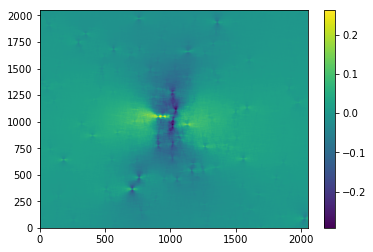

In [4]:
# Visualize the gamma field
import numpy as np
reshape_size=int(np.sqrt(loaded_catalog.gamma1_inf.size))
gamma1_inf = loaded_catalog.gamma1_inf.reshape((reshape_size,reshape_size))
pyplot.pcolormesh(gamma1_inf)
pyplot.colorbar()
pyplot.show()

In [8]:
# Read in a sample config file and build the profile from specified configuration
import simutils
config = simutils.readConfiguration('sampleconfig.py')

In [9]:
# Load the simreader specified in the config
simreader_from_configfile = config['simreader']
loaded_sim_from_config = simreader_from_configfile.load('/home/babyostrich/data/mxxl/halo_54_100_0')

# Build the profile with builder specified from config
profilebuilder_from_config = config['profilebuilder']
profile_of_sim_from_config = profilebuilder_from_config(loaded_sim_from_config)

Loading /home/babyostrich/data/mxxl/halo_54_100_0
Center Offset: 0.00679080894095 -0.635730686328


In [16]:
# These are the available fields
print profile_of_sim_from_config.table.keys()

['sigma_ghat', 'beta_s', 'ngals', 'r_mpc', 'ghat', 'beta_s2']


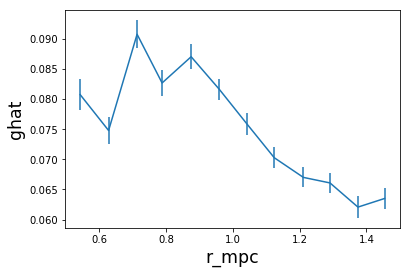

In [20]:
profile_of_sim_from_config.table['r_mpc'] #center of radial bins
pyplot.errorbar(profile_of_sim_from_config.table['r_mpc'], profile_of_sim_from_config.table['ghat'], 
                yerr=profile_of_sim_from_config.table['sigma_ghat'])
pyplot.xlabel('r_mpc',fontsize='xx-large')
pyplot.ylabel('ghat',fontsize='xx-large')
pyplot.show()

Loading /home/babyostrich/data/mxxl/halo_54_100_0
Center Offset: 0.0 0.0
Center Offset: 0.0 0.0


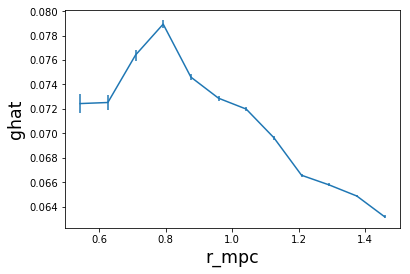

In [24]:
# Now we do the same with an "ideal" config
config = simutils.readConfiguration('idealsampleconfig.py')
simreader_from_configfile = config['simreader']
loaded_sim_from_config = simreader_from_configfile.load('/home/babyostrich/data/mxxl/halo_54_100_0')
profile_of_sim_from_config = profilebuilder_from_config(loaded_sim_from_config)
profilebuilder_from_config = config['profilebuilder']
profile_of_sim_from_config = profilebuilder_from_config(loaded_sim_from_config)
pyplot.errorbar(profile_of_sim_from_config.table['r_mpc'], profile_of_sim_from_config.table['ghat'], 
            yerr=profile_of_sim_from_config.table['sigma_ghat'])
pyplot.xlabel('r_mpc',fontsize='xx-large')
pyplot.ylabel('ghat',fontsize='xx-large')
pyplot.show()